# Overfitting and Regulzarization

This tutorial is meant to be a gentle introduction to machine learning. We present a simple polynomial fitting example using a least squares solution, which is a specific case of what is called maximum likelihood, but we will not get into details about it in this tutorial. We use this example to introduce important machine learning concepts.

The goals of this tutorial are:
  - Explain how to develop an experiment. Split your data into development set (*i.e.*, train and validaion) and test set.   
  - Introduce the concepts of *overfitting*, *underfitting*, and *model generalization*.
  - Introduce the *regularization* method for reducing *overfitting*.
 

This tutorial is interactive and it corresponds to an adaptation of the example presented in chapter 1 of the book: **Christopher M. Bishop. 2006. Pattern Recognition and Machine Learning (Information Science and Statistics). Springer-Verlag New York, Inc., Secaucus, NJ, USA.**

## Designing your experiment

Machine learning builds models by learning from data. When designing your experiment, you need to split your data into a development set and a test set. The development set is split in 2 sets: a train set and validation set. The train set is used to learn the parameters of the different models you are training. The validation set is employed to select the best model among the different models you trained, therefore it has a bias and cannot be used as proof of generalization. The test set is used to see if the selected model generalizes well to unseen data. 

<img src="../Figures/train_val_test.png" alt="Drawing" style="width: 500px;"/>

## Generating synthetic data

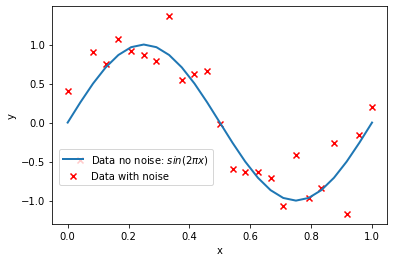

In [1]:
# Directive to make plots inline as opposed to having pop-up plots 
%matplotlib inline 
import numpy as np # Import numpy with nickname np
import matplotlib.pylab as plt # plotting library
from ipywidgets import * # Interaction library

var = 0.3 #Noise variance

#Create data set
N = 25
x = np.linspace(0, 1, N) 
y_noiseless = np.sin(2*np.pi*x) # signal
y = y_noiseless + np.random.normal(0, var, N) #signal + noise


# Plot entire data set with and without noise
plt.figure()
plt.plot(x,y_noiseless,linewidth = 2.0,label = r'Data no noise: $sin(2 \pi x)$')
plt.scatter(x,y,color ='red', marker = 'x', label = r'Data with noise')
plt.legend(loc = (0.02, 0.18))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Splitting the data into train, validation, and test sets

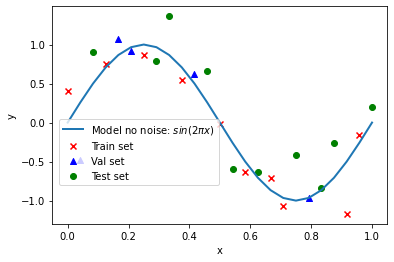

In [2]:
# Splitting the data in train/val/test sets - size of each set was choosen arbitrarily
train_size = 10
val_size = 5
test_size = 10

indexes = np.arange(N, dtype =int)
np.random.seed(seed = 2) # Random seed to keep results always the same
np.random.shuffle(indexes) # Shuffling the data before the split

# Train set
aux = indexes[:train_size]
aux = np.sort(aux)
x_train = x[aux]
y_train = y[aux] 

#Val set
aux = indexes[train_size: train_size + val_size]
aux = np.sort(aux)
x_val= x[aux]
y_val = y[aux]

# Test set
aux = indexes[-test_size:]
aux = np.sort(aux)
x_test = x[aux]
y_test = y[aux]

# Plot train/val/test sets
plt.figure()
plt.plot(x,y_noiseless,linewidth = 2.0,label = r'Model no noise: $sin(2 \pi x)$')
plt.scatter(x_train,y_train,color ='red', marker = 'x', label = "Train set")
plt.scatter(x_val,y_val,color = 'blue',marker = '^' , label = "Val set")
plt.scatter(x_test,y_test,color = 'green', marker = 'o', label = "Test set")
plt.legend(loc = (0.02, 0.18))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Data

Observations: $$\boldsymbol{X} =[x_1,x_2,...,x_N]^T$$
Target:  $$\boldsymbol{T} =[t_1,t_2,...,t_N]^T$$


## Model

$$y(x,\boldsymbol{W})= w_0 + w_1x +w_2x^2+...+w_mx^m = \sum^M_{j=0}w_jx^j$$,

Weights:  $$\boldsymbol{W} =[t_1,t_2,...,t_M]^T$$

## Cost Function

Quadratic cost function: $$E(\boldsymbol{W})=\frac{1}{2}\sum_{n=1}^N\{y(x_n,\boldsymbol{W})-t_n\}^2$$

Computing the derivative of the cost function and making it equal to zero, we can find the vector **W*** that minimizes the error:
$$ \boldsymbol{W}^* = (\boldsymbol{A}^T\boldsymbol{A})^{-1}\boldsymbol{A} ^T\boldsymbol{T}$$

Where **A** is defined by:

$$\boldsymbol{A} = \begin{bmatrix}
    1 & x_{1} & x_{1}^2 & \dots  & x_{1}^M \\
    1 & x_{2} & x_{2}^2 & \dots  & x_{2}^M \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{N} & x_{N}^2 & \dots  & x_{N}^M
\end{bmatrix}$$

In [3]:
#Least squares polynomial fitting solution
# Implementation of the equation shown above 
def polynomial_fit(X,T,M):
    A = np.power(X.reshape(-1,1),np.arange(0,M+1).reshape(1,-1))
    T = T.reshape(-1,1)
    W = np.dot(np.linalg.pinv(A),T)
    return W.ravel()

Plotting the least squares result varying the polynomial degree between  0 a 9. **Which model is a good model?**

In [4]:
def plotmodel(M):
    coefs = polynomial_fit(x_train, y_train, M)[::-1]
    print("Weights:\n", coefs)
    p = np.poly1d(coefs)
    plt.figure()
    plt.plot(x,y_noiseless,linewidth = 1.5,label = r'Data no noise: $sin(2 \pi x)$')
    plt.scatter(x_train,y_train,color='red',label= "Train set")
    plt.xlabel("x")
    plt.ylabel(r'y')
    y_fit = p(x_train) 
    plt.plot(x_train,y_fit,linewidth = 1.0,label ="Polynomial Fit")
    plt.legend(loc=(0.02,0.02))
    plt.show()

interact(plotmodel,M=(0,9,1))  

interactive(children=(IntSlider(value=4, description='M', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.plotmodel(M)>

Depending on the degree of the polynome we fit to our data, we may under one of these categories:

- **Under-fitting**: the model is to inflexible and is not able to capture any patterns in the data.

- **Over-fitting**: the model is to flexible. It ends up tuning to the random noise in the data. The model may have a low error in the train set, but it is not expected to generalize well to new (unseen) data.

- **Good fit**: The model is capture patterns in our data, but it does not get tuned to the random noise in the data. Better chances to generalize to new and unseen data.

A good exercise is to visually determine whether the model is under-fitting, over-fitting or it is a good model based on the polynomial degree and the plot shown above. 

## Root mean squared error and Model Selection

$$E_{RMS}=\sqrt{2E(\boldsymbol{W^*})/N}$$

We will use the root mean squared error in the validation set to select our model.

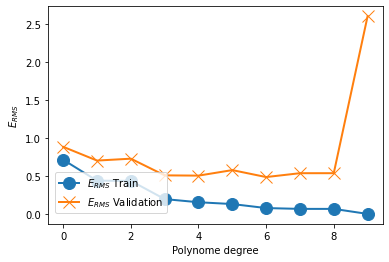

Model selected was a  polynome of degree 6
Root mean squared test error: 4.225


In [5]:
# Computes RMS error
def rms_error(X,T,W):
    p = np.poly1d(W)
    T_fit = p(X)
    E = np.sqrt(((T - T_fit)**2/T.size).sum())
    return E
   
m = range(10)
train = []
val = []

# Compute RMS error across different polynomial fits
for M in m:
    W = polynomial_fit(x_train, y_train, M)[::-1]
    error_train = rms_error(x_train,y_train,W)
    error_val = rms_error(x_val,y_val,W)
    train.append(error_train)
    val.append(error_val)

# Plot the errors
plt.figure()
plt.plot(m,train,linewidth = 2.0,marker = 'o',markersize = 12,label = r'$E_{RMS}$ Train')
plt.plot(m,val,linewidth = 2.0,marker = 'x',markersize = 12,label = r'$E_{RMS}$ Validation')
plt.legend(loc = (0.02, 0.05))
plt.xlabel("Polynome degree")
plt.ylabel(r'$E_{RMS}$')
plt.show()


# Model selection
best_M = np.argmin(val)
W = polynomial_fit(x_train, y_train, M)[::-1]
test_error = rms_error(x_test,y_test,W)
print("Model selected was a  polynome of degree %d" %best_M)
print("Root mean squared test error: %.3f" %test_error)

## Cost function with regularization

$$E(\boldsymbol{w})=\frac{1}{2}\sum_{n=1}^N\{y(x_n,\boldsymbol{w})-t_n\}^2 +\frac{\lambda}{2}||\boldsymbol{W}||^2$$

The solution of the above equation is given by:

$$\boldsymbol{W}^* = (\boldsymbol{A}^T\boldsymbol{A} + \lambda n\boldsymbol{I})^{-1}\boldsymbol{A} ^T\boldsymbol{T} $$

In [6]:
#Least square solution with regularization
def polynomial_fit_reg(X,T,M,lamb):
    N = X.shape[0]
    A = np.power(X.reshape(-1,1),np.arange(0,M+1).reshape(1,-1))
    lambda_matrix = lamb*N*np.eye(M+1)
    T = T.reshape(-1,1)
    aux = np.dot(A.T,A) + lambda_matrix
    aux = np.linalg.pinv(aux)
    aux2 = np.dot(A.T,T)
    W = np.dot(aux,aux2)
    return W.ravel()

In the demo below, we show the influence of $\lambda$ and $M$ in the polynomial fitting.

In [7]:
def plotmodel2(M,log_lamb):
    lamb = np.exp(log_lamb)
    coefs = polynomial_fit_reg(x_train, y_train, M,lamb)[::-1]
    print("W:\n",coefs)
    print("Lambda\n", lamb)
    p = np.poly1d(coefs)
    plt.figure()
    plt.plot(x,y_noiseless,linewidth = 1.5,label = r'Data no noise: $sin(2 \pi x)$')
    plt.scatter(x_train,y_train,color='red',label= "Train set")
    plt.xlabel("x")
    plt.ylabel(r'y')
    y_fit = p(x_train) 
    plt.plot(x_train,y_fit,linewidth = 1.0,label ="Polynomial Fit")
    plt.legend(loc=(0.02,0.02))
    plt.show()
interact(plotmodel2,M=(0,9,1),log_lamb = (-40,-9,.1))  

interactive(children=(IntSlider(value=4, description='M', max=9), FloatSlider(value=-25.0, description='log_la…

<function __main__.plotmodel2(M, log_lamb)>

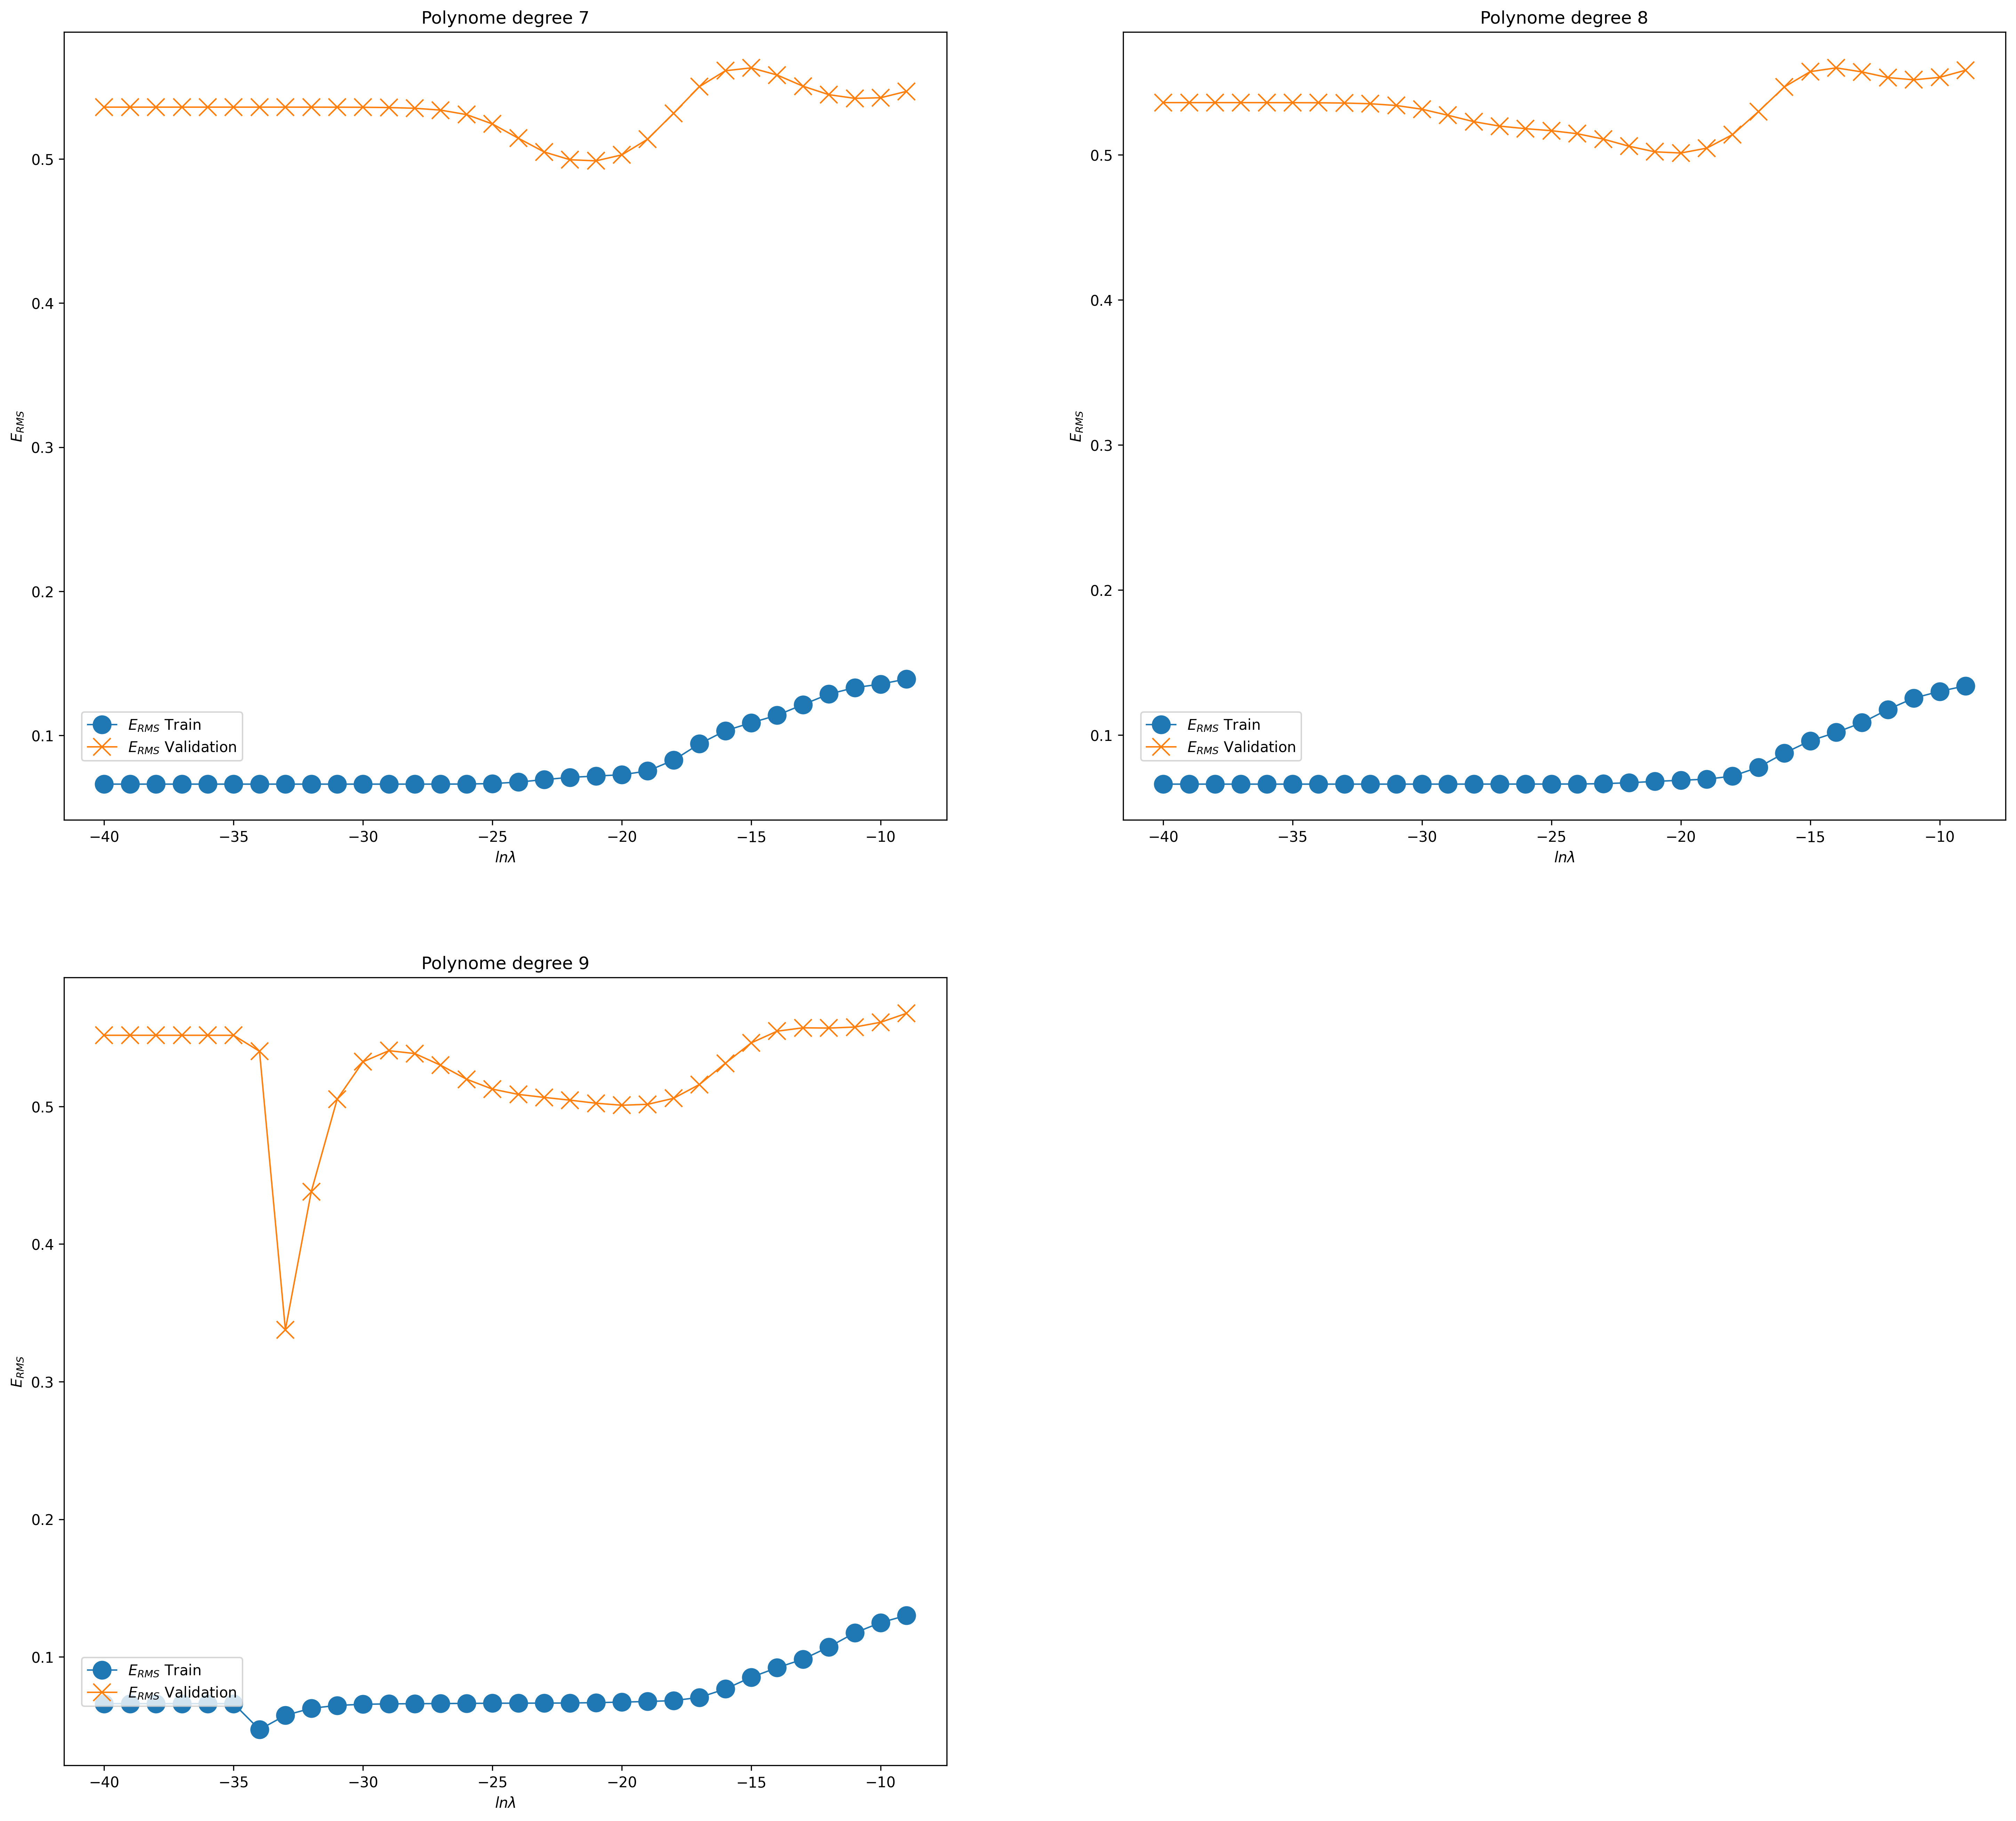

Model selected was a  polynome of degree 9 with lambda = 4.658886e-15
Root mean squared test error: 0.728


In [8]:
log_lamb = range(-40,-8)
M = range(7,10)
train = np.zeros((len(log_lamb), len(M)))
val = np.zeros((len(log_lamb), len(M)))

for (i,m) in enumerate(M):
    for (j,l) in enumerate(log_lamb):
        lamb = np.exp(l)
        coeffs = polynomial_fit_reg(x_train, y_train, m,lamb)[::-1]
        train[j,i] = rms_error(x_train,y_train,coeffs)
        val[j,i] = rms_error(x_val,y_val,coeffs)
    
plt.figure(figsize = (24,22), dpi = 300)
for (i,m) in enumerate(M):
    plt.subplot(2, 2, i + 1)
    plt.plot(log_lamb,train[:,i],linewidth = 1.0,marker = 'o',markersize = 12,label = r'$E_{RMS}$ Train')
    plt.plot(log_lamb,val[:,i],linewidth = 1.0,marker = 'x',markersize = 12,label = r'$E_{RMS}$ Validation')
    plt.legend(loc = (0.02, 0.075))
    plt.xlabel(r'$ln\lambda$')
    plt.ylabel(r'$E_{RMS}$')
    plt.title("Polynome degree %d" %m)
plt.show()

# Model selection
best_M_reg = np.unravel_index(val.argmin(), val.shape)
W = polynomial_fit_reg(x_train, y_train, M[best_M_reg[1]], np.exp(log_lamb[best_M_reg[0]]))[::-1]
test_error = rms_error(x_test,y_test,W)
print("Model selected was a  polynome of degree %d with lambda = %e" %(M[best_M_reg[1]], np.exp(log_lamb[best_M_reg[0]])))
print("Root mean squared test error: %.3f" %test_error)

## Activity suggestions

- Change the input signal;
- Change the noise intensity;
- Use more data for training your model;